In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train = '/content/drive/My Drive/Data_mining/LSTM.ipynb'

In [6]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from nltk import PorterStemmer


In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
df = pd.read_csv('/content/drive/My Drive/Data_mining/amazon_unlocked_mobile_datasets.csv')

In [9]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [10]:
df = df.drop(['Price', 'Review Votes'], axis=1)

# EDA and Data Preprocessing

In [11]:
df.head()

,Product Name,Brand Name,Rating,Reviews
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,5,I feel so LUCKY to have found this used (phone...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,4,"nice phone, nice up grade from my pantach revu..."
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,5,Very pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,4,It works good but it goes slow sometimes but i...
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,4,Great phone to replace my lost phone. The only...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Product Name  413840 non-null  object
 1   Brand Name    348669 non-null  object
 2   Rating        413840 non-null  int64 
 3   Reviews       413778 non-null  object
dtypes: int64(1), object(3)
memory usage: 12.6+ MB


In [13]:
df.isnull().sum()

Product Name        0
Brand Name      65171
Rating              0
Reviews            62
dtype: int64

As you can see there are 65171 Null values in Brand Name column, if we drop these Null values it means we will drop 65171 row which is a big loss of data. So instead of droping these Null values we will change the Null values into another Unknown brand Name, like this we will save our data.

In [14]:
df['Brand Name'].fillna('Unknown', inplace = True)

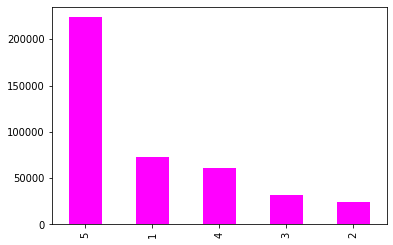

In [15]:
import matplotlib.pyplot as plt
df['Rating'].value_counts().plot.bar(color='Magenta')

In [16]:
df['sentiments'] = df['Rating'].apply(lambda x: 1 if x>=3 else 0)
df.head()

,Product Name,Brand Name,Rating,Reviews,sentiments
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,5,I feel so LUCKY to have found this used (phone...,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,4,"nice phone, nice up grade from my pantach revu...",1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,5,Very pleased,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,4,It works good but it goes slow sometimes but i...,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,4,Great phone to replace my lost phone. The only...,1


1    316762
0     97078
Name: sentiments, dtype: int64


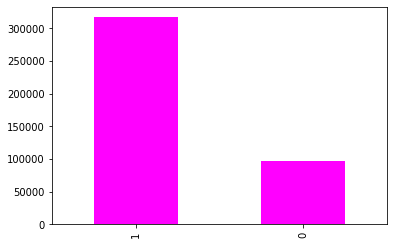

In [17]:
print(df['sentiments'].value_counts())
df['sentiments'].value_counts().plot.bar(color='Magenta')

## Separate Dependent and Idependent Features

In [19]:
# Dependent Features
y = df['sentiments']

# Independent Features
X = df.drop('sentiments', axis=1)

## Porter Stemmer

In [20]:
messages = X.copy()
stopwords = set(stopwords.words('english'))

In [21]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', str(messages['Reviews'][i]))
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords]
    review = ' '.join(review)
    corpus.append(review)

In [22]:
corpus[1]

'nice phone nice grade pantach revu clean set easi set never android phone fantast say least perfect size surf social media great phone samsung'

# Tokenizing

Hyperparametres

In [23]:
voc_size = 50000
max_length = 150
embedding_features = 32

In [24]:
tokenizer = Tokenizer(num_words = voc_size, oov_token="<OOV>")
tokenizer.fit_on_texts(corpus)

Here, the value of oov_token is set to be ‘OOV’. That means any unknown words will be replaced by oov_token.

# Embedding

In [25]:
sequences = tokenizer.texts_to_sequences(corpus)
embedded_docs = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
embedded_docs[0]

array([ 117, 1543,  224,    4,    2,  185,    4,  220,    2,  382,  358,
        208,  564,    7,  368,    8,  115,    7,  388,  977, 1036,  100,
         39,  208,   82,   73,   21, 1065, 3083,  143,    4,    2,   56,
         73,  372,   13,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], d

In [26]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [27]:
X_final.shape, y_final.shape

((413840, 150), (413840,))

# Model Creation

In [28]:
from tensorflow.keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Embedding
model = Sequential()
model.add(Embedding(voc_size, embedding_features, input_length=max_length))
model.add(Dropout(0.33))
model.add(LSTM(100))
model.add(Dropout(0.33))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 32)           1600000   
                                                                 
 dropout (Dropout)           (None, 150, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)               

# Split Data into Train and Test

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# Model Training

In [30]:
model_training = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10, batch_size=64)

Epoch 1/10
4333/4333 [==============================] - 1139s 262ms/step - loss: 0.5471 - accuracy: 0.7659 - val_loss: 0.5441 - val_accuracy: 0.7650
Epoch 2/10
4333/4333 [==============================] - 1112s 257ms/step - loss: 0.5364 - accuracy: 0.7694 - val_loss: 0.5434 - val_accuracy: 0.7655
Epoch 3/10
4333/4333 [==============================] - 1170s 270ms/step - loss: 0.5401 - accuracy: 0.7679 - val_loss: 0.5426 - val_accuracy: 0.7660
Epoch 4/10
4333/4333 [==============================] - 1197s 276ms/step - loss: 0.5382 - accuracy: 0.7684 - val_loss: 0.5423 - val_accuracy: 0.7663
Epoch 5/10
4333/4333 [==============================] - 1131s 261ms/step - loss: 0.5317 - accuracy: 0.7681 - val_loss: 0.5434 - val_accuracy: 0.7663
Epoch 6/10
4333/4333 [==============================] - 1140s 263ms/step - loss: 0.5375 - accuracy: 0.7686 - val_loss: 0.5424 - val_accuracy: 0.7667
Epoch 7/10
4333/4333 [==============================] - 1110s 256ms/step - loss: 0.3516 - accuracy: 0.8520

In [40]:
model.evaluate(X_test, y_test, batch_size=64, verbose=2)

2134/2134 - 171s - loss: 0.1822 - accuracy: 0.9299 - 171s/epoch - 80ms/step


[0.18220192193984985, 0.9299103617668152]

# Performance Metrics and Accuracy

In [41]:
y_predict = ((model.predict(X_test)>0.5).astype('int32'))

4268/4268 [==============================] - 139s 32ms/step


## Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[ 26665,   5486],
       [  4086, 100331]])

## Accuracy Score 

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9299103743190206